In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division

import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import os
from util import *

In [2]:
def set_limits_axes(FG, xlim, ylim):
    for axis in FG.axes:
        for ax in axis:
            if any(xlim):
                ax.set_xlim(*xlim)
            if any(ylim):
                ax.set_ylim(*ylim)
                
def set_size(FG, size):
    for axis in FG.axes:
        for ax in axis:
            for c in ax.get_legend_handles_labels()[0]:
                c.set_sizes([size])

def set_logy(FG):
    for axis in FG.axes:
        for ax in axis:
            ax.set_yscale("log")
            
def set_logx(FG):
    for axis in FG.axes:
        for ax in axis:
            ax.set_xscale("log")


In [3]:
def id_part(r, part_size=1000):
    part = r['rankBirth'] // part_size
    part += 1
    if part >= 5001//part_size:
        part = 5001//part_size
    part *= part_size
    part -= part_size / 2
    return int(part)

In [4]:
df_long = pd.read_csv('no_cost.csv', na_values=['NA','None'])
df_long.loc[df_long.Exp_type == 'no disease','DiseaseStrength'] = 'no disease'
df_long.set_index(['Exp_Num','Ind_ID'], inplace=True)

df_long['cost'] = [(round(m,2), round(f,2)) for m, f in zip(df_long.muscleCost, df_long.fatCost)]
df_long['speedBefore'] = df_long.distanceAfter / df_long.lifetime
df_long['distance'] = df_long['distanceAfter']
df_long['absCellCountMuscle'] = df_long['absCellCountMuscleBefore']
df_long['relCellCountMuscle'] = df_long['relCellCountMuscleBefore']
df_long['absCellCountBone'] = df_long['absCellCountBoneBefore']
df_long['relCellCountBone'] = df_long['relCellCountBoneBefore']
df_long['TissueComplexity'] = df_long['TissueComplexityBefore']
df_long['MeanTissueComplexity'] = df_long['MeanTissueComplexityBefore']

df_long['speed'] = df_long.distance / df_long.lifetime

df_long = load_offspring(df_long, 'no_cost_offspring.json')
df_long = rank_by_birthtime(df_long)

df_long.reset_index(inplace=True)
df_long['id_part'] = df_long.apply(lambda r : id_part(r, 1000),axis=1)

ds_order = ['no disease', 'default_prob_per_fat', 'double_prob_per_fat', 'very_high_prob_per_fat']

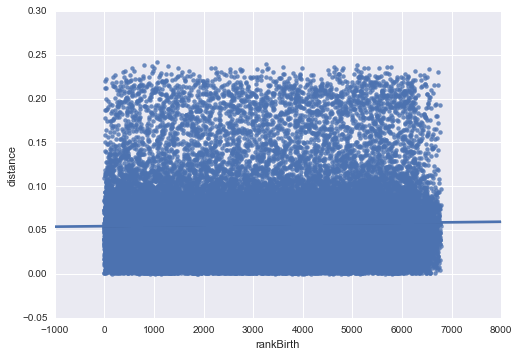

In [5]:
sns.regplot(data=df_long, x='rankBirth', y='distance')

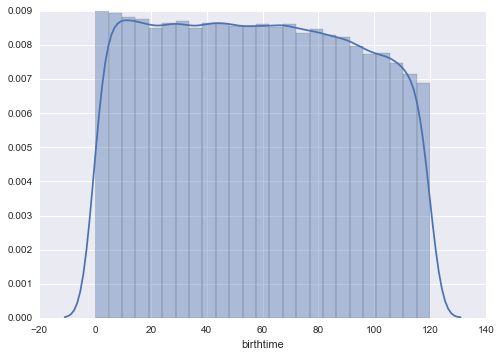

In [6]:
sns.distplot(df_long.birthtime.dropna(), bins=25)

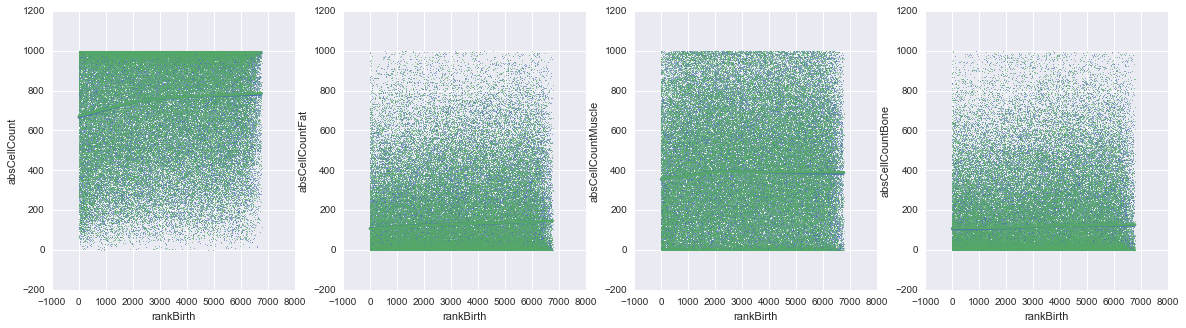

In [8]:
fig, ax = plt.subplots(1,4,figsize=(20,5))
colors = sns.color_palette(n_colors = 4)

for j, y in enumerate(['absCellCount', 'absCellCountFat','absCellCountMuscle','absCellCountBone']):
    for i, ds in enumerate(ds_order):
        d = df_long[df_long.DiseaseStrength == ds]
        if d.empty:
            continue
        sns.regplot(data=d, x='rankBirth', y=y, color=colors[i], ax=ax[j], scatter_kws={'s':1}, lowess=True)